In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

## Analyzing Dataset

In [4]:
housing_market_data = pd.read_csv("house.csv")
housing_market_data.head()

,bedroom_count,net_sqm,center_distance,metro_distance,floor,age,price
0,1,26.184098,1286.68,204.003817,22,67,96004.804557
1,1,34.866901,1855.25,186.980360,8,30,92473.722568
2,1,36.980709,692.09,111.224999,24,24,98112.519942
3,1,17.445723,1399.49,237.998760,1,66,92118.326874
4,1,52.587646,84.65,100.996400,20,3,98976.653176


In [5]:
for i in range(0, len(housing_market_data.columns)): 
    print(housing_market_data.iloc[:,i].dtype) # Checking if the data types are correct

int64
float64
float64
float64
int64
int64
float64


In [6]:
housing_market_data.isnull().sum() # Checking for missing values

bedroom_count      0
net_sqm            0
center_distance    0
metro_distance     0
floor              0
age                0
price              0
dtype: int64

In [7]:
housing_market_data.describe()

,bedroom_count,net_sqm,center_distance,metro_distance,floor,age,price
count,4308.000000,4308.000000,4308.000000,4308.000000,4308.000000,4308.000000,4308.000000
mean,3.732823,118.941327,1090.544301,105.665358,9.397168,48.576834,95701.196185
std,2.476989,95.469802,555.325830,60.750825,7.517018,27.621465,3919.823988
min,1.000000,10.244518,11.800000,1.245338,1.000000,0.000000,86113.592974
25%,2.000000,52.240659,635.897500,56.156897,2.000000,25.000000,92934.251436
50%,3.000000,91.828201,1143.135000,101.388012,8.000000,48.000000,95337.792918
75%,5.000000,150.987591,1554.280000,148.481068,16.000000,72.000000,97980.675094
max,17.000000,750.971604,1999.840000,330.275317,24.000000,97.000000,118134.771190


## Splitting Dataset

In [8]:
X_data = housing_market_data.iloc[:, :-1]
y_data = housing_market_data.iloc[:, -1]
X_data

,bedroom_count,net_sqm,center_distance,metro_distance,floor,age
0,1,26.184098,1286.68,204.003817,22,67
1,1,34.866901,1855.25,186.980360,8,30
2,1,36.980709,692.09,111.224999,24,24
3,1,17.445723,1399.49,237.998760,1,66
4,1,52.587646,84.65,100.996400,20,3
...,...,...,...,...,...,...
4303,9,175.166533,1299.71,217.739012,2,5
4304,6,215.352151,1346.36,77.724676,14,5
4305,5,299.563972,1585.37,235.537881,3,5
4306,1,29.193907,1896.23,147.223827,4,2


In [9]:
from sklearn.model_selection import train_test_split

In [10]:

X_train, X_valid, y_train, y_valid = train_test_split(X_data, y_data, random_state=0)

## Using Linear Regression

In [11]:
from sklearn.linear_model import LinearRegression

In [12]:
linear_regression_model = LinearRegression()
linear_regression_model.fit(X_train, y_train)

LinearRegression()

In [13]:
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import mean_absolute_percentage_error
from sklearn.metrics import median_absolute_error

In [14]:
predicted_house_prices = linear_regression_model.predict(X_valid)

In [15]:
print("Predictions: ", predicted_house_prices[:5])
print("Actual: ", y_valid[:5])

Predictions:  [94736.50395287 96658.56131725 95930.91656722 94087.13567708
 92699.69722404]
Actual:  1119    96426.526925
2734    95784.659028
1798    97188.481700
481     94688.042935
559     93982.036968
Name: price, dtype: float64


In [16]:
def median_absolute_percentage_error(y_true, y_predicted):
    errors = np.abs((y_true - y_predicted) / y_true) * 100
    return np.median(errors)

def display_metrics(y_true, y_predicted):
    mae_0 = mean_absolute_error(y_true, y_predicted)
    mae_1 = median_absolute_error(y_true, y_predicted)
    mae_perc_0 = mean_absolute_percentage_error(y_true, y_predicted)
    mae_perc_1 = median_absolute_percentage_error(y_true, y_predicted)
    
    print("Mean Absolute Error (MAE): ", "{:.4f}".format(mae_0), sep="\t")
    print("Median Absolute Error (MAE): ", "{:.4f}".format(mae_1), sep="\t")

    print("\nMean Absolute Percentage Error (MAPE): ", "{:.2f}%".format(mae_perc_0), sep="\t\t")
    print("Median Absolute Percentage Error (MAPE): ", "{:.2f}%".format(mae_perc_1), sep="\t")

In [17]:
# Metrics for Linear Regression Model
display_metrics(y_valid, predicted_house_prices)

Mean Absolute Error (MAE): 	1479.6201
Median Absolute Error (MAE): 	1172.8740

Mean Absolute Percentage Error (MAPE): 		0.02%
Median Absolute Percentage Error (MAPE): 	1.22%


## Using Decision Tree

In [18]:
from sklearn.tree import DecisionTreeRegressor

In [19]:
decision_tree_model = DecisionTreeRegressor(random_state=0)
decision_tree_model_2 = DecisionTreeRegressor(max_depth=2, random_state=0)
decision_tree_model_3 = DecisionTreeRegressor(max_depth=3, random_state=0)
decision_tree_model_4 = DecisionTreeRegressor(max_depth=4, random_state=0)
decision_tree_model_5 = DecisionTreeRegressor(max_depth=5, random_state=0)
decision_tree_model_6 = DecisionTreeRegressor(max_depth=6, random_state=0)
decision_tree_model_7 = DecisionTreeRegressor(max_depth=7, random_state=0)
decision_tree_model_8 = DecisionTreeRegressor(max_depth=8, random_state=0)

In [20]:
decision_tree_model.fit(X_train, y_train)
decision_tree_model_2.fit(X_train, y_train)
decision_tree_model_3.fit(X_train, y_train)
decision_tree_model_4.fit(X_train, y_train)
decision_tree_model_5.fit(X_train, y_train)
decision_tree_model_6.fit(X_train, y_train)
decision_tree_model_7.fit(X_train, y_train)
decision_tree_model_8.fit(X_train, y_train)

DecisionTreeRegressor(max_depth=8, random_state=0)

In [21]:
loss_axis = []

y_pred_DTree = decision_tree_model.predict(X_valid)
y_pred_DTree_2 = decision_tree_model_2.predict(X_valid)
y_pred_DTree_3 = decision_tree_model_3.predict(X_valid)
y_pred_DTree_4 = decision_tree_model_4.predict(X_valid)
y_pred_DTree_5 = decision_tree_model_5.predict(X_valid)
y_pred_DTree_6 = decision_tree_model_6.predict(X_valid)
y_pred_DTree_7 = decision_tree_model_7.predict(X_valid)
y_pred_DTree_8 = decision_tree_model_8.predict(X_valid)

loss_axis.append(mean_absolute_error(y_valid, y_pred_DTree))
loss_axis.append(mean_absolute_error(y_valid, y_pred_DTree_2))
loss_axis.append(mean_absolute_error(y_valid, y_pred_DTree_3))
loss_axis.append(mean_absolute_error(y_valid, y_pred_DTree_4))
loss_axis.append(mean_absolute_error(y_valid, y_pred_DTree_5))
loss_axis.append(mean_absolute_error(y_valid, y_pred_DTree_6))
loss_axis.append(mean_absolute_error(y_valid, y_pred_DTree_7))
loss_axis.append(mean_absolute_error(y_valid, y_pred_DTree_8))

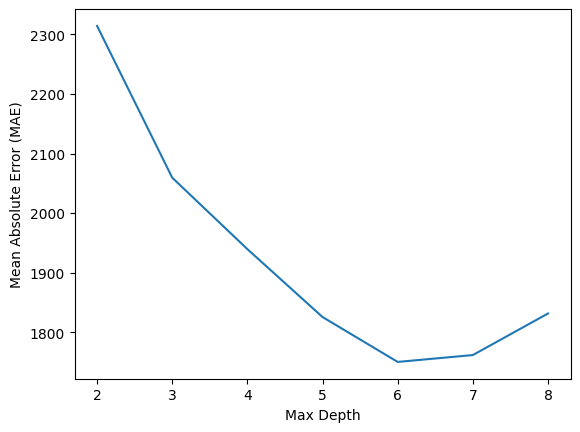

MAE with NO Max Depth:  2201.7241724836153


In [22]:
plt.plot(np.arange(2,9), np.array(loss_axis[1:]))
plt.xlabel("Max Depth")
plt.ylabel("Mean Absolute Error (MAE)")
plt.show()

print("MAE with NO Max Depth: ",loss_axis[0])
# Therefore, the most optimtimal Max Depth is 6

In [23]:
# Metrics for Decision Tree Model
display_metrics(y_valid, y_pred_DTree_6)

Mean Absolute Error (MAE): 	1750.0785
Median Absolute Error (MAE): 	1404.6456

Mean Absolute Percentage Error (MAPE): 		0.02%
Median Absolute Percentage Error (MAPE): 	1.48%


## Using Random Forests

In [24]:
from sklearn.ensemble import RandomForestRegressor

In [31]:
random_forest_model = RandomForestRegressor(random_state=0)
random_forest_model_maxDepth_6 = RandomForestRegressor(max_depth=6, random_state=0)
random_forest_model.fit(X_train, y_train)
random_forest_model_maxDepth_6.fit(X_train, y_train)

RandomForestRegressor(max_depth=6, random_state=0)

In [32]:
y_pred_RForest = random_forest_model.predict(X_valid)
y_pred_RForest_1 = random_forest_model_maxDepth_6.predict(X_valid)

In [33]:
# Metrics for Random Forest Models
display_metrics(y_valid, y_pred_RForest)

Mean Absolute Error (MAE): 	1547.4949
Median Absolute Error (MAE): 	1231.8475

Mean Absolute Percentage Error (MAPE): 		0.02%
Median Absolute Percentage Error (MAPE): 	1.29%


In [35]:
display_metrics(y_valid, y_pred_RForest_1)

Mean Absolute Error (MAE): 	1623.2314
Median Absolute Error (MAE): 	1281.4888

Mean Absolute Percentage Error (MAPE): 		0.02%
Median Absolute Percentage Error (MAPE): 	1.34%


Linear Regression seems to be the best option.